Install required packages

In [1]:
# Provides tools for checking phylogeny tree against online ground truth
!pip install opentree

# provides tools for monophyly and phylogeny
!pip install biopython
from Bio import Phylo

# provides tools for monophyly and phylogeny
! pip install ete3
from ete3 import Tree

# used to render the tree beautifully
!pip install pyqt5
# set flag for rendering
import os
os.environ['QT_QPA_PLATFORM']='offscreen'


Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
You should consider upgrading via the '/home/elhamod/melhamodenv3/bin/python3 -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
You should consider upgrading via the '/home/elhamod/melhamodenv3/bin/python3 -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
You should consider upgrading via the '/home/elhamod/melhamodenv3/bin/python3 -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
You should consider upgrading via the '/home/elhamod/melhamodenv3/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# from io import StringIO

# # Tree
# handleD = StringIO("((E:0.2,D:0.1,C:0.1,B:0.3)2:0.3,A:0.5)1;")
# treeD = Phylo.read(handleD,"newick")

# # Distance
# treeD.distance("E","D")

By default, a tree does not have distances defined. We add those distances. Each edge distance=1

In [3]:
#read tree. This tree was provided by Wasila
treefile = "/raid/elhamod/Fish/Taxa/bgnn-tree-2021-01-29.tre"
tree = Phylo.read(treefile, "newick")

# adding branch lengths
clades = tree.find_clades()
for clade in clades:
    clade.branch_length = 1
    
# example of a distance
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=1, name='Neopterygii_ott471203')
        Clade(branch_length=1, name='Clupeocephala_ott285819')
            Clade(branch_length=1, name='Otomorpha_ott761450')
                Clade(branch_length=1, name='Otophysi_ott285818')
                    Clade(branch_length=1, name='mrcaott231ott2200')
                        Clade(branch_length=1, name='mrcaott231ott3121')
                            Clade(branch_length=1, name='mrcaott231ott103051')
                                Clade(branch_length=1, name='Notropis_greenei_ott103051')
                                Clade(branch_length=1, name='Notropis_nazas_ott338646')
                                Clade(branch_length=1, name='Notropis_cummingsae_ott608193')
                                Clade(branch_length=1, name='mrcaott231ott101080')
                                    Clade(branch_length=1, name='Notropis_hudsonius_ott135051')
                                    Clade(branch_

In [4]:
species1 = "Lepisosteus_osseus_ott519445"
species2 = "Lepisosteus_oculatus_ott1028028"
print('(', species1, ',', species2, ') is ', tree.is_monophyletic([species1, species2]))
print("distance between", species1, " and ", species2, " is " , tree.distance(species1,species2))

( Lepisosteus_osseus_ott519445 , Lepisosteus_oculatus_ott1028028 ) is  False
distance between Lepisosteus_osseus_ott519445  and  Lepisosteus_oculatus_ott1028028  is  2


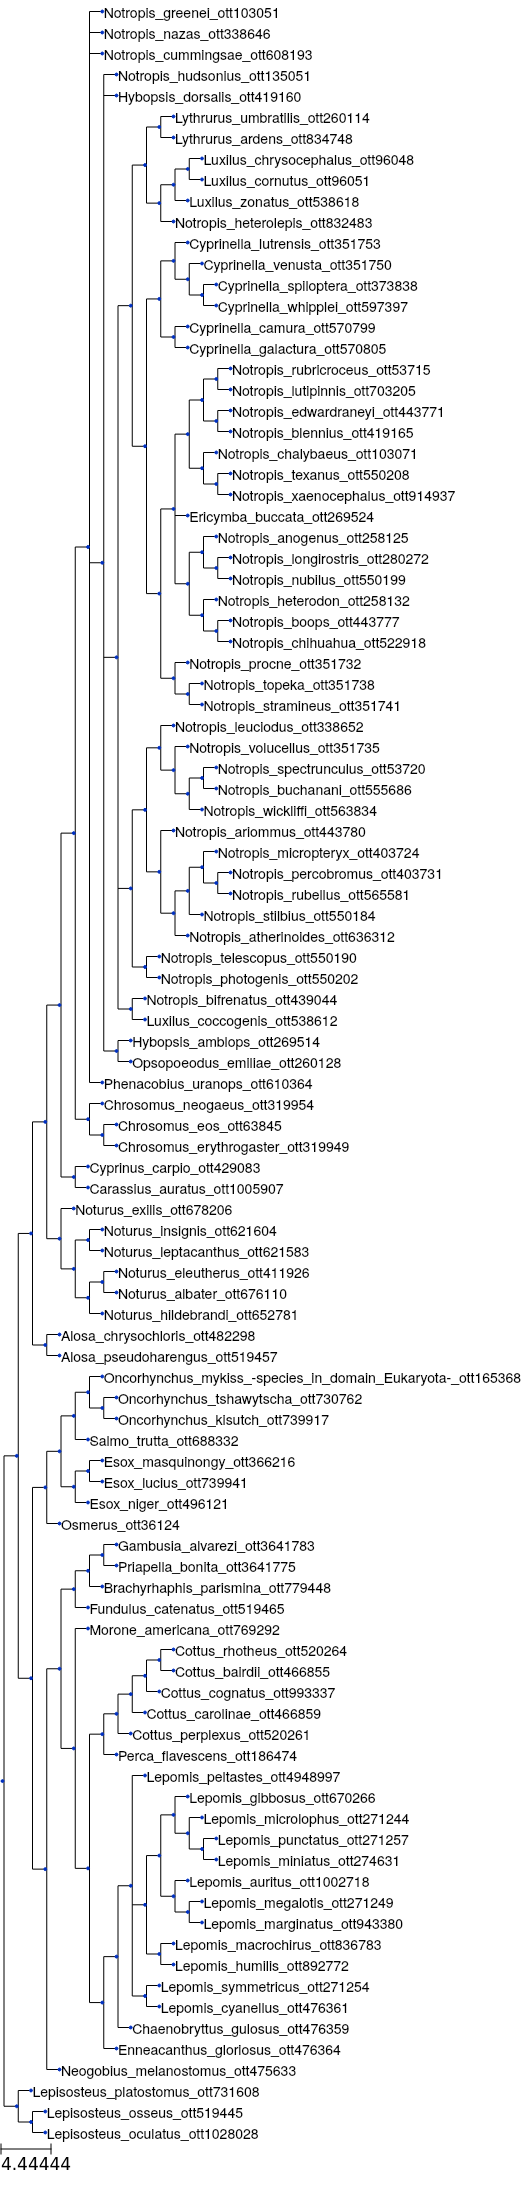

In [5]:
# tree_file = "/raid/elhamod/Fish/Curated4/Medium/cleaned_metadata.tre"
tree_file = "/raid/elhamod/Fish/Taxa/bgnn-tree-2021-01-29.tre"

# Read and print the tree
t = Tree(tree_file, format=8)

def getGenus(species):
    return species.split('_')[0]

for leaf in t:
    leaf.add_features(genus=getGenus(leaf.name))
    
# render
# print(t)
t.render('%%inline')



In [6]:
#Timetree package
print(t.get_ascii(attributes=["name", "genus"], show_internal=False))


                     /-Notropis_greenei_ott103051, Notropis
                    |
                    |--Notropis_nazas_ott338646, Notropis
                    |
                    |--Notropis_cummingsae_ott608193, Notropis
                    |
                    |   /-Notropis_hudsonius_ott135051, Notropis
                    |  |
                    |  |--Hybopsis_dorsalis_ott419160, Hybopsis
                    |  |
                    |  |            /-Lythrurus_umbratilis_ott260114, Lythrurus
                    |  |         /-|
                    |  |        |   \-Lythrurus_ardens_ott834748, Lythrurus
                    |  |        |
                    |  |      /-|         /-Luxilus_chrysocephalus_ott96048, Luxilus
                    |  |     |  |      /-|
                    |  |     |  |   /-|   \-Luxilus_cornutus_ott96051, Luxilus
                    |  |     |  |  |  |
                    |  |     |   \-|   \-Luxilus_zonatus_ott538618, Luxilus
                    |  

Check whether some species are monophylic or not

In [7]:
species1 = "Lepisosteus_osseus_ott519445"
species2 = "Lepisosteus_oculatus_ott1028028"
print('(', species1, ',', species2, ') is ', t.check_monophyly(values=[species1, species2], target_attr="name")[1])
print('(', species1, ',',species2, ') distance is ', t.get_distance(species1,species2))

species1 = "Lepomis_gibbosus_ott670266"
species2 = "Lepomis_microlophus_ott271244"
print('(', species1, ',',species2, ') is ', t.check_monophyly(values=[species1, species2], target_attr="name")[1])
print('(', species1, ',',species2, ') distance is ', t.get_distance(species1,species2))

species1 = "Neogobius_melanostomus_ott475633"
species2 = "Lepisosteus_oculatus_ott1028028"
print('(', species1, ',',species2, ') is ', t.check_monophyly(values=[species1, species2], target_attr="name")[1])
print('(', species1, ',',species2, ') distance is ', t.get_distance(species1,species2))

( Lepisosteus_osseus_ott519445 , Lepisosteus_oculatus_ott1028028 ) is  monophyletic
( Lepisosteus_osseus_ott519445 , Lepisosteus_oculatus_ott1028028 ) distance is  2.0
( Lepomis_gibbosus_ott670266 , Lepomis_microlophus_ott271244 ) is  paraphyletic
( Lepomis_gibbosus_ott670266 , Lepomis_microlophus_ott271244 ) distance is  3.0
( Neogobius_melanostomus_ott475633 , Lepisosteus_oculatus_ott1028028 ) is  polyphyletic
( Neogobius_melanostomus_ott475633 , Lepisosteus_oculatus_ott1028028 ) distance is  7.0


Given a metadata spreadsheet, get the tree of that spreadsheet

Included taxonomy:  ['Gambusia affinis', 'Notropis stramineus', 'Lepomis cyanellus', 'Noturus gyrinus', 'Notropis atherinoides', 'Esox americanus', 'Lepomis macrochirus', 'Phenacobius mirabilis', 'Notropis buchanani', 'Lepomis humilis', 'Cyprinus carpio', 'Notropis boops', 'Morone chrysops', 'Lepomis gulosus', 'Notropis buccatus', 'Lepomis megalotis', 'Lepomis auritus', 'Notropis blennius', 'Notropis hudsonius', 'Noturus exilis', 'Notropis nubilus', 'Notropis dorsalis', 'Noturus flavus', 'Notropis volucellus', 'Lepomis microlophus', 'Notropis percobromus', 'Carassius auratus', 'Notropis wickliffi', 'Notropis telescopus', 'Morone mississippiensis', 'Lepisosteus platostomus', 'Noturus nocturnus', 'Lepomis gibbosus', 'Noturus miurus', 'Lepisosteus osseus', 'Notropis leuciodus', 'Notropis texanus', 'Alosa chrysochloris'] 38
Gambusia affinis 	 -> 	 Gambusia affinis
Notropis stramineus 	 -> 	 Notropis stramineus
Lepomis cyanellus 	 -> 	 Lepomis cyanellus
Noturus gyrinus 	 -> 	 Noturus gyrinu

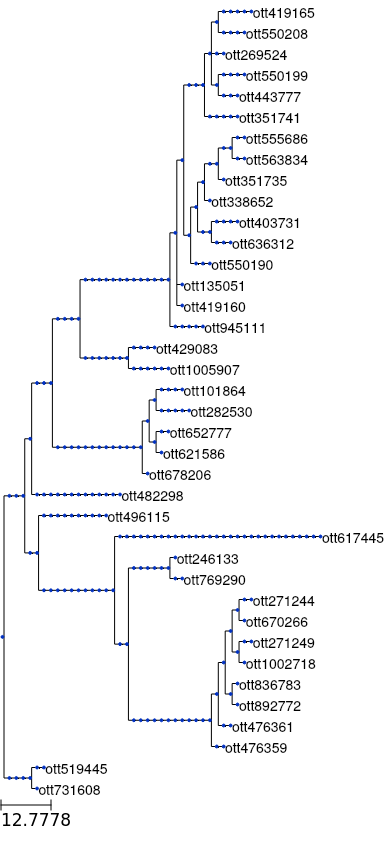

In [8]:
# Look at research in metric learning using deep learning
#Adding triplet losses (with an anchor)

from opentree import OT
import pandas as pd

import pprint
pp = pprint.PrettyPrinter(indent=4)

from ete3 import Tree
# set flag for rendering
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

# prefix_path = "/raid/elhamod/Fish/Curated4/Medium"
prefix_path = "/raid/elhamod/Fish/Curated4/Easy_50"
metadataFile = "cleaned_metadata.csv"
treefile = "cleaned_metadata.tre"

metadataFile = os.path.join(prefix_path, metadataFile)
treefile = os.path.join(prefix_path, treefile)

# Get the taxonomy
df = pd.read_csv(metadataFile, sep="\t") # , usecols=['scientificName']
df_nodupes = df['scientificName'].drop_duplicates() # Will probably need more processing to deal with small letter...etc
node_ids = df_nodupes.tolist()
print('Included taxonomy: ', node_ids, len(node_ids))

# df = pd.read_csv(metadataFile, sep="\t")

# get the response tree
resp = OT.tnrs_match(node_ids, do_approximate_matching=True)
# pp.pprint(resp.response_dict)
matches = resp.response_dict['results']
unmatched_names = resp.response_dict['unmatched_names']

# Get the corresponding ott_ids
df2 = pd.DataFrame(columns=['in csv', 'in response', 'Same?'])
ott_ids = set()
ott_id_dict={}
assert len(unmatched_names)==0 # everything is matched!
for match_array in matches:
    match_array_matches = match_array['matches']
    assert len(match_array_matches)==1, match_array['name'] + " has too many matches" + str(list(map(lambda x: x['matched_name'], match_array_matches)))  # we have one unambiguous match!
    first_match = match_array_matches[0]
    ott_id = first_match['taxon']['ott_id']
    ott_ids.add(ott_id)
    #some original and matched names are not exactly the same. Not a bug
    df2 = df2.append({'in csv':match_array['name'], 'in response': first_match['matched_name'], 'Same?': match_array['name'] == first_match['matched_name']}, ignore_index=True)
    print(match_array['name'], '\t -> \t', first_match['matched_name']) 
    ott_id_dict[match_array['name']] = ott_id
ott_ids = list(ott_ids)
print(df2[df2['Same?']== False])
# print(ott_ids, len(ott_ids))
pp.pprint(ott_id_dict)

# add ott_id to metadata csv file
df['ott_id'] = df.apply(lambda row: ott_id_dict[row['scientificName']], axis=1)
# print(df)

# save and print the tree

#Get the synthetic tree from OpenTree
output = OT.synth_induced_tree(ott_ids=ott_ids, ignore_unknown_ids=False, label_format='id') # name_and_id ott_ids=list(ott_ids),
print(output.tree)
output.tree.write(path = treefile, schema = "newick")
# output.tree.print_plot(width=100)
t = Tree(treefile, format=8)
D = t.search_nodes(name="mrcaott47023ott496121")[0]
D.name = "ott496115"
t.write(format=8, outfile=treefile)
t.render('%%inline')


In [9]:
# from opentree import OT

# import pprint
# pp = pprint.PrettyPrinter(indent=4)

# from ete3 import Tree

# node_ids=["Homo sapiens", "Mus musculus", "Ameiurus catus"]
# resp = OT.tnrs_match(node_ids, do_approximate_matching=True)
# # pp.pprint(resp.response_dict)
# matches = resp.response_dict['results']
# ott_ids=set()
# for match_array in matches:
#     match_array_matches = match_array['matches']
#     assert len(match_array_matches)==1, match_array['name'] + " has too many matches" + str(list(map(lambda x: x['matched_name'], match_array_matches)))  # we have one unambiguous match!
#     first_match = match_array_matches[0]
#     ott_id = first_match['taxon']['ott_id']
#     ott_ids.add(ott_id)
# ott_ids = list(ott_ids)
# output12 = OT.synth_induced_tree(ott_ids=ott_ids, ignore_unknown_ids=False, label_format='name_and_id') # name_and_id ott_ids=list(ott_ids),
# print(output12.tree)
# treefile12="deleteme.tre"
# output12.tree.write(path = treefile12, schema = "newick")
# # output.tree.print_plot(width=100)
# t12 = Tree(treefile12, format=8)
# # D = t.search_nodes(name="mrcaott47023ott496121")[0]
# # D.name = "ott496115"
# t12.write(format=8, outfile=treefile12)
# t12.render('%%inline')

In [10]:
# pp.pprint(resp.response_dict)

In [11]:
# matched name -> ott -> save in csv
# load csv -> look at tree ->get distance

species1 = 'Notropis blennius'
species2 = 'Notropis texanus'

ott_id1 = 'ott' + str(ott_id_dict[species1])
ott_id2 = 'ott' + str(ott_id_dict[species2])

print('distance between', species1, 'and', species2, 'is', t.get_distance(ott_id1, ott_id2))




distance between Notropis blennius and Notropis texanus is 9.0


In [12]:
# pp.pprint(resp.response_dict)

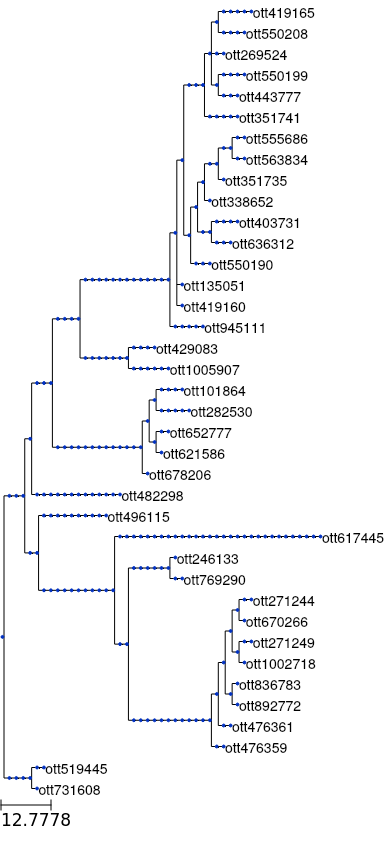

In [13]:
t = Tree('/raid/elhamod/Fish/Curated4/Easy_50/cleaned_metadata.tre', format=1)
t.render('%%inline')

In [14]:
print(t)


                                                                                                /- /- /- /- /-ott419165
                                                                                             /-|
                                                                                            |   \- /- /- /-ott550208
                                                                                            |
                                                                                          /-|-- /-ott269524
                                                                                         |  |
                                                                                         |  |   /- /- /- /-ott550199
                                                                                 /- /- /-|   \-|
                                                                                |        |      \- /- /-ott443777
                                         

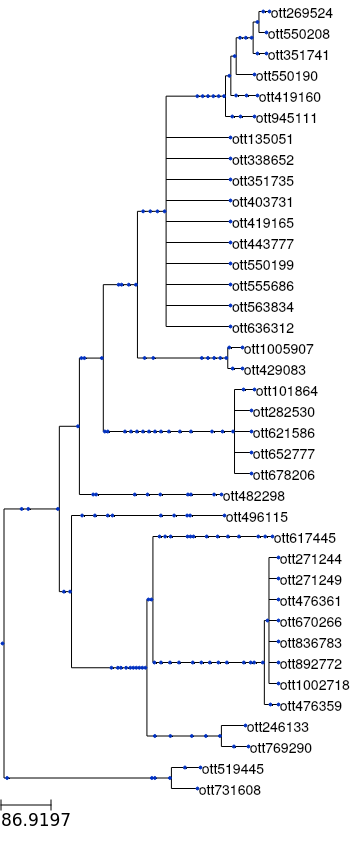

In [15]:
josef_tree_path="/home/elhamod/projects/HGNN/code/HGNN/HGNN/Josephscript/Output/datelife.phy"
ttt = Tree(josef_tree_path, format=1)
ttt.render('%%inline')
# For all nodes, replace name woth ottid